In [76]:
# import the necessary packages
import numpy as np
import cv2
from utils.imutils import displayImage, resize
from imutils import perspective
import imutils
from imutils import contours

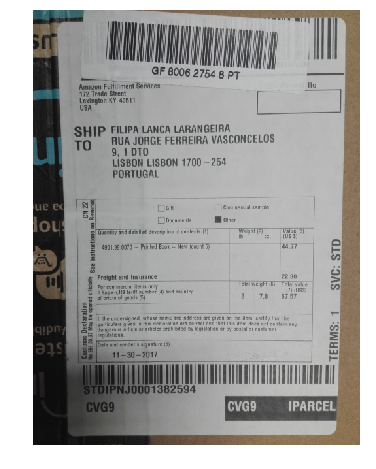

In [77]:
# load the image and convert it to grayscale
image = cv2.imread('images/barcode_02.jpg')
image = resize(image, width=500)
displayImage(image)

In [78]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
 
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

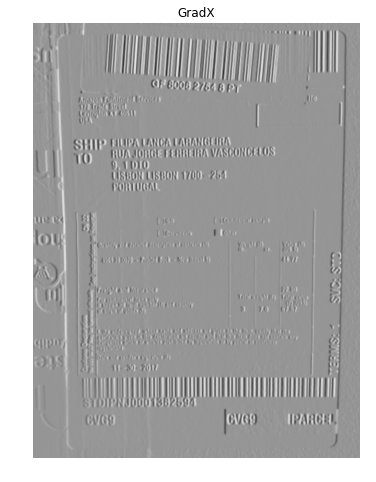

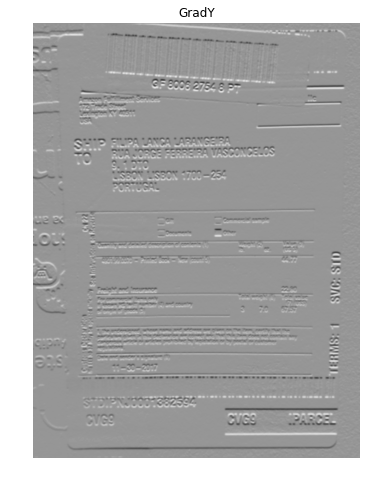

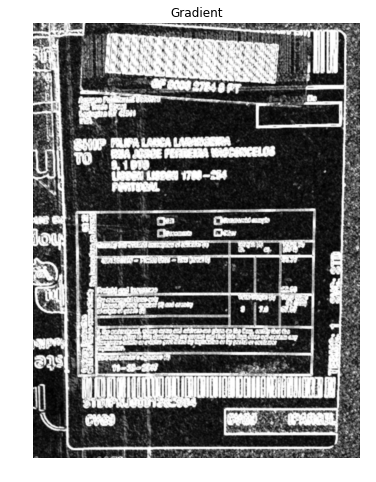

In [79]:
displayImage(gradX, title='GradX')
displayImage(gradY, title='GradY')
displayImage(gradient, title='Gradient')

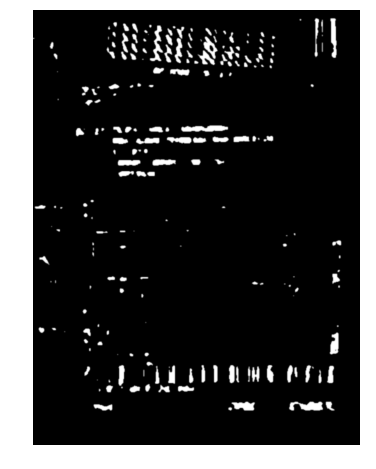

In [92]:
# blur and threshold the image
blurred = cv2.GaussianBlur(gradient, (13, 13), 0)
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
displayImage(thresh)

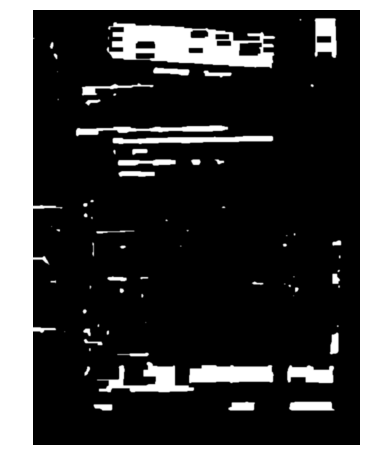

In [93]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
displayImage(closed)

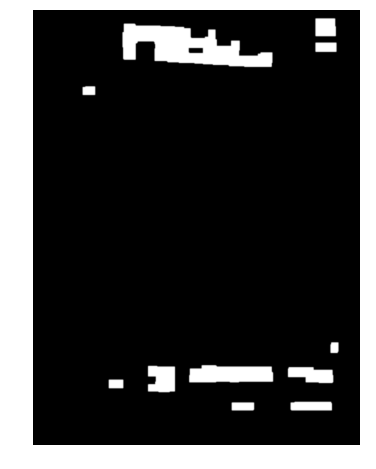

In [94]:
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 5)
closed = cv2.dilate(closed, None, iterations = 5)
displayImage(closed)

Found 11 contours


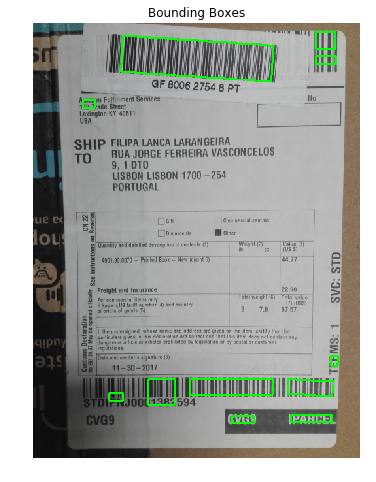

In [95]:
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts, _) = contours.sort_contours(cnts, method='top-to-bottom')
 
# loop over the contours individually and get bounding boxes
boxes = []
for c in cnts:
    
    # compute the rotated bounding box of the contour
    box = cv2.minAreaRect(c)
    box = cv2.boxPoints(box) 
    box = np.array(box, dtype="int")
 
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
    box = perspective.order_points(box)
    boxes.append(box)

boxes = np.array(boxes)
print("Found {} contours".format(len(boxes)))
 
orig = image.copy()

for b in boxes:
    cv2.drawContours(orig, [b.astype("int")], -1, (0, 255, 0), 2)

displayImage(orig, title="Bounding Boxes")